In [1]:
import numpy as np
import matplotlib.pyplot as plt
from distanceMatrix import build_distance_matrix, matrix_closure, distance_values, clusterings_with_hors, get_seq_as_txt
from Bio import SeqIO
import json

In [2]:
seq_record = SeqIO.read("./data/vitis/chr2_1916902-2002902.fasta", "fasta")
input_seq = str(seq_record.seq)

In [3]:
monomer_size = 107
dna_seqs = [input_seq[sq_index * monomer_size : (sq_index + 1) * monomer_size] for sq_index in range(len(input_seq) // monomer_size)]

In [4]:
dna_seq_dists = build_distance_matrix(dna_seqs)

(array([2.8200e+02, 3.2000e+01, 5.5000e+01, 3.2000e+01, 5.7000e+01,
        8.5000e+01, 1.5200e+02, 1.7700e+02, 3.8600e+02, 2.3400e+02,
        4.4800e+02, 3.8500e+02, 8.4400e+02, 1.0220e+03, 1.3240e+03,
        1.4940e+03, 1.8910e+03, 2.0050e+03, 2.3660e+03, 2.5360e+03,
        3.0220e+03, 3.1570e+03, 3.3120e+03, 2.9950e+03, 3.3990e+03,
        3.0750e+03, 3.5420e+03, 3.3920e+03, 3.4360e+03, 3.5070e+03,
        3.6830e+03, 3.7980e+03, 3.8950e+03, 3.9490e+03, 3.9860e+03,
        4.2640e+03, 4.0510e+03, 4.3210e+03, 4.4910e+03, 4.5220e+03,
        4.8830e+03, 5.0930e+03, 5.9240e+03, 7.2030e+03, 8.1680e+03,
        9.4480e+03, 1.1028e+04, 1.2830e+04, 1.4830e+04, 1.6637e+04,
        1.8384e+04, 1.9636e+04, 1.9702e+04, 1.9518e+04, 1.7894e+04,
        1.5197e+04, 1.1121e+04, 6.8580e+03, 3.6640e+03, 1.7910e+03,
        1.0350e+03, 6.6300e+02, 4.1100e+02, 2.6800e+02, 1.4200e+02,
        5.3000e+01, 1.5000e+01, 3.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12

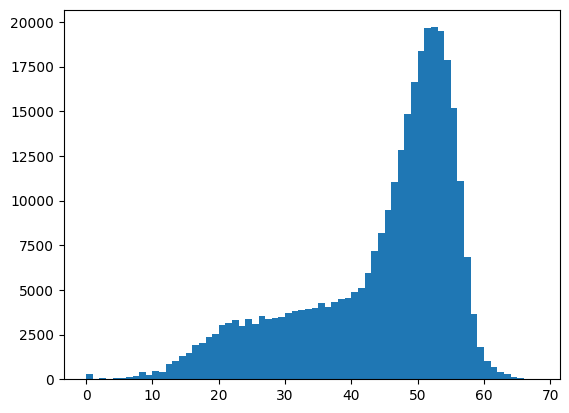

In [5]:
dist_values = distance_values(dna_seq_dists)
plt.hist(dist_values, bins=max(dist_values))

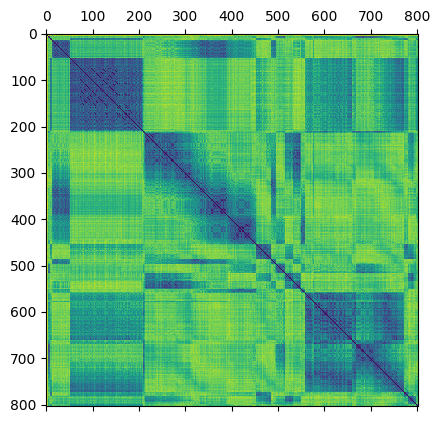

In [6]:
plt.matshow(dna_seq_dists)

In [7]:
# plt.matshow(matrix_closure(dna_seq_dists<=4))

In [8]:
clusterings = clusterings_with_hors(dna_seq_dists)

Checking clusters for max distance 0...
Found 704 clusters
Checking clusters for max distance 1...
Found 685 clusters
Checking clusters for max distance 2...
Found 661 clusters
Checking clusters for max distance 3...
Found 641 clusters
Checking clusters for max distance 4...
Found 613 clusters
Checking clusters for max distance 5...
Found 578 clusters
Checking clusters for max distance 6...
Found 494 clusters
Checking clusters for max distance 7...
Found 448 clusters
Checking clusters for max distance 8...
Found 387 clusters
Checking clusters for max distance 9...
Found 320 clusters
Checking clusters for max distance 10...
Found 249 clusters
Checking clusters for max distance 11...
Found 186 clusters
Looking for loops in Num clusters: 186, Seq: *****hh***ii*****DDDDDBDDBDDB*D*DB*DBD*BDDDDBDDDBDD*CCCC*C*CCC*CC*C***CC*CFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCY*CCYCjCkClCCFCCCCCYCjCkClCCFCCFCCCmCCCFCCCmCCCFFCCC*A*A*BBZBDBTBBBZBDBTBBBZBDBT**BBBB*DD

In [9]:
[
    [str(loop)
    for loop in clustering.loops]
    for clustering in clusterings
]

[['CFMCCCFFNCCC in [73:156]', 'JI in [670:682]'], ['CECCCCEECCCC in [73:156]']]

In [10]:
[
    str(clustering)
    for clustering in clusterings
]

["Num clusters: 186, Seq: *****hh***ii*****DDDDDBDDBDDB*D*DB*DBD*BDDDDBDDDBDD*CCCC*C*CCC*CC*C***CC*CFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCCCFMCCCFFNCCY*CCYCjCkClCCFCCCCCYCjCkClCCFCCFCCCmCCCFCCCmCCCFFCCC*A*A*BBZBDBTBBBZBDBTBBBZBDBT**BBBB*DDB*BBDDBT*BBBBBBBBBBDDB*BBBBBBBBB*DBBBBB*DDB*BODBBnDBBnBBOBOO*BOBODDBBD**DDDPDBDDPBoDPBoPBDBDDDBDBDDDPBD**DDDLDL*BDBDDDDBDBDDDDBDBDDDDBDBDDDDBDBDDL*pqarEL*apqarEELEL*KEKEEEEKEKEEEEKEKEEEEKEKEEEEKEKEEL******L***HHHbHHc*cbHHc**H**HHHdbHHdH*dHHDDDPBD**DD*UstuVeU*UstuVe*VeUV*Qvfwg*fwgQgQ**Qvf**B**DDBBBBB*BBD*E*L*EEEE*AAAGGA*GGAAAA**GGG*OAAAAAAAGAAAAAAAGGAAAAAAAAAAAAAAGGG*AAAAAAAAAAAAAAAAGGAAAAAAGGGAAAAAAA*A*AAAAAAAAA**AAAAAAA*JIJIJIJIJIJI*IJI*R**RJIJxIJxIRIyRJIyRAAA***A*AAAAAAWAAAXSAAAAAAWAAAXSAAAAAAWAAAXSAAAAAAWAAAXS**S*******z**z**************Q***********, Loops: ['CFMCCCFFNCCC in [73:156]', 'JI in [670:682]']",
 "Num clusters: 142, Seq: mnopqWWrstXXuvwAAAAAAAAAAAAAAxAAAAyAAAAAAAAAAAAAAAAzCCCCCC*CCCECC*CC*CCC*CECCCCEECCCCC

In [13]:
output_filename = f'data/vitis/clusterings/{seq_record.id.replace(":","_")}.json'
with open(output_filename, "w") as write_file:
    json.dump([
        clustering.to_dict() for clustering in clusterings
    ], write_file, indent=4)